# Exporting the data

In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [197]:
#Reading the excel file and storing our dataset into a dataframe "df" 

In [424]:
df1 = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx', sheet_name='Existing employees')

In [425]:
df1['left' ]= 0

In [426]:
df2 = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx', sheet_name='Employees who have left')

In [427]:
df2['left'] = 1

In [428]:
df = pd.concat([df1, df2], axis=0)
df = df.drop("Emp ID", axis=1)

# Scrubbing the data

In [429]:
# Moving the left column to the front
cols = df.columns.tolist()
cols
cols.insert(0, cols.pop(cols.index('left')))
cols
df = df.reindex(columns=cols)

In [430]:
df.head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0,0.58,0.74,4,215,3,0,0,sales,low
1,0,0.82,0.67,2,202,3,0,0,sales,low
2,0,0.45,0.69,5,193,3,0,0,sales,low
3,0,0.78,0.82,5,247,3,0,0,sales,low
4,0,0.49,0.60,3,214,2,0,0,sales,low


In [431]:
#Check to see if there are any missing values in our data set
df.isnull().any()

left                     False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
dtype: bool

In [432]:
# Renaming certain columns for better readability
df = df.rename(columns={'left':'left','satisfaction_level':'satisfaction','last_evaluation':'evaluation','number_project':'numberofProject',
                        'average_montly_hours':'averageMonthlyHours','time_spend_company':'yearsAtCompany','Work_accident':'workAccident','promotion_last_5years':'promotionLast5Years'})

# Exploring the Data

In [433]:
# Shape of the dataset
df.shape

(14999, 10)

In [434]:
#dataype
df.dtypes

left                     int64
satisfaction           float64
evaluation             float64
numberofProject          int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotionLast5Years      int64
dept                    object
salary                  object
dtype: object

In [435]:
#determine the ratio of stayed and left employees
left_rate = df.left.value_counts()/len(df)
left_rate

0    0.761917
1    0.238083
Name: left, dtype: float64

In [436]:
# Statistical overview of the employees
df.describe()

,left,satisfaction,evaluation,numberofProject,averageMonthlyHours,yearsAtCompany,workAccident,promotionLast5Years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [437]:
#Let us get a sense of the numbers across these two classes of employees
left_summary = df.groupby('left').mean()
left_summary

,satisfaction,evaluation,numberofProject,averageMonthlyHours,yearsAtCompany,workAccident,promotionLast5Years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [438]:
# We can calculate categorical means for categorical variable; such as department and salary to get a more sense of our data.
dept_overview = df.groupby('dept').mean()
dept_overview

,left,satisfaction,evaluation,numberofProject,averageMonthlyHours,yearsAtCompany,workAccident,promotionLast5Years
dept,,,,,,,,
IT,0.222494,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.002445
RandD,0.153748,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.034307
accounting,0.265971,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.018253
hr,0.290934,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.020298
management,0.144444,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.109524
marketing,0.236597,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.050117
product_mng,0.219512,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.000000
sales,0.244928,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.024155
support,0.248991,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.008973


In [439]:
#salary overview
salary_overview = df.groupby('salary').mean()
salary_overview

,left,satisfaction,evaluation,numberofProject,averageMonthlyHours,yearsAtCompany,workAccident,promotionLast5Years
salary,,,,,,,,
high,0.066289,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.058205
low,0.296884,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.009021
medium,0.204313,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.028079


# Visualizing our Data

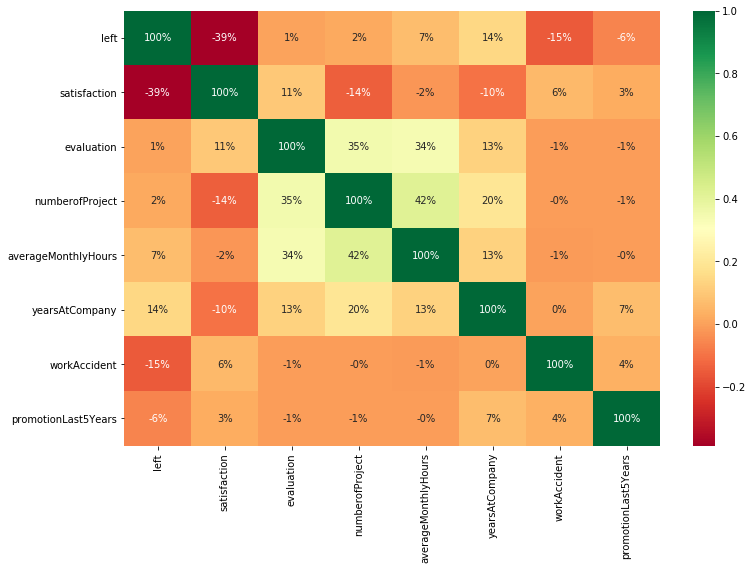

In [214]:
# Get the correlation of the columns excluding the categorical columns(dept & salary)
df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='RdYlGn')
plt.savefig('Heatmap_chart')

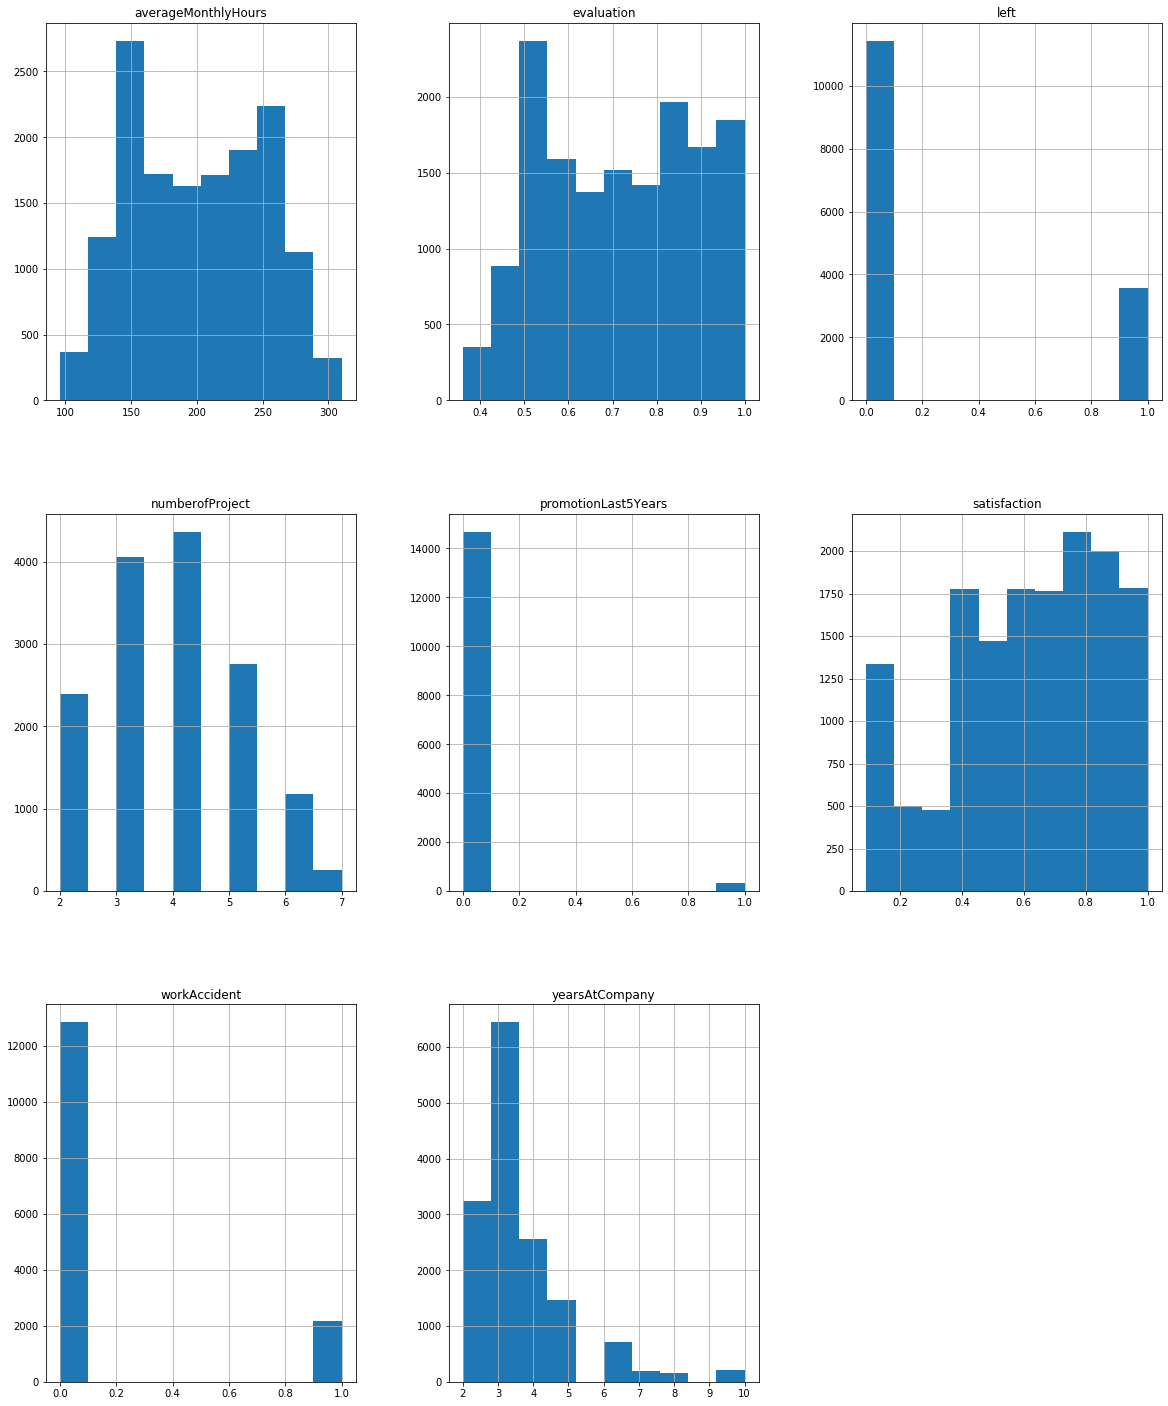

In [440]:
# Distribution plots of employee features
num_bins = 10
df.hist(bins=num_bins, figsize=(20, 25))
plt.savefig("Df_histogram_plots")
plt.show()

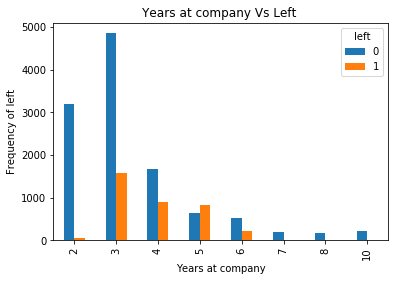

In [286]:
pd.crosstab(df.yearsAtCompany,df.left).plot(kind='bar')
plt.title('Years at company Vs Left ')
plt.xlabel('Years at company')
plt.ylabel('Frequency of left')
plt.savefig('years at company_bar_chart')

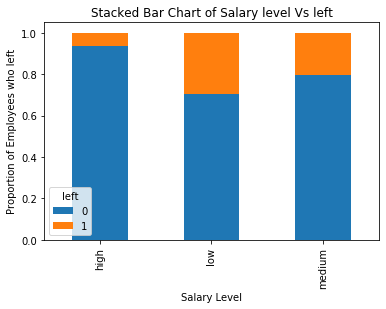

In [287]:
#Bar chart showing the relationship between salary level and left
table=pd.crosstab(df.salary, df.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary level Vs left')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees who left')
plt.savefig('Salary_bar_chart')

The salary level here determines a great deal in turnover. This could be a good predictor in predicting the outcome.

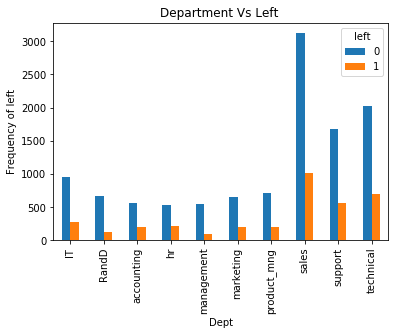

In [288]:
#Bar chart of the departments employee work and Proportion of Employees who left
pd.crosstab(df.dept,df.left).plot(kind='bar')
plt.title('Department Vs Left ')
plt.xlabel('Dept')
plt.ylabel('Frequency of left')
plt.savefig('department_bar_chart')

From the graph, we can see that sales, technical and support department were the top 3 departments that had employee who left the company while management had the lowest

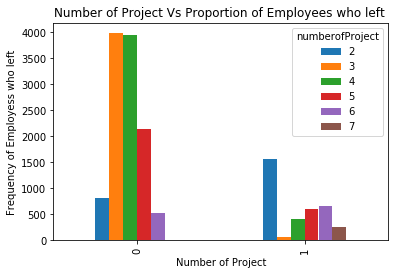

In [289]:
#Bar chat of Project vs Proportion of Employees who left
pd.crosstab(df.left,df.numberofProject).plot(kind='bar')
plt.title('Number of Project Vs Proportion of Employees who left ')
plt.xlabel('Number of Project')
plt.ylabel('Frequency of Employess who left')
plt.savefig('project_bar_chart')

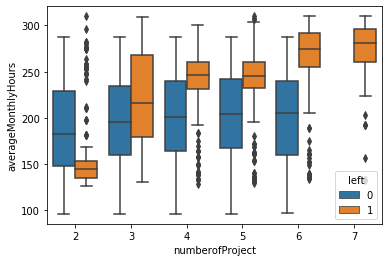

In [450]:
#Bar chat of Number of Project vs AverageMonthlyHours
sns.boxplot(x="numberofProject", y="averageMonthlyHours", hue="left", data=df)
plt.savefig('Numberofproject')

# Creating Dummy Variables for Categorical Variables
salary & dept

In [441]:
#independent variable
x = df.iloc[:, 1:10].values
print(x)

[[0.58 0.74 4 ... 0 'sales' 'low']
 [0.82 0.67 2 ... 0 'sales' 'low']
 [0.45 0.69 5 ... 0 'sales' 'low']
 ...
 [0.37 0.53 2 ... 0 'support' 'low']
 [0.11 0.96 6 ... 0 'support' 'low']
 [0.37 0.52 2 ... 0 'support' 'low']]


In [442]:
#Dependent variable
y = df.iloc[:, 0].values
print(y)

[0 0 0 ... 1 1 1]


In [443]:
#Encoding independent categorical variable
ct= ColumnTransformer(transformers=[('one_hot_encoder', OneHotEncoder(categories='auto'),[7,8])], remainder='passthrough')
x = np.array(ct.fit_transform(x),dtype=np.float)
print(ct)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('one_hot_encoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 [7, 8])],
                  verbose=False)


In [444]:
#encoded X
print(x)

[[0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 3. 0. 0.]
 ...
 [0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 4. 0. 0.]
 [0. 0. 0. ... 3. 0. 0.]]


In [445]:
# Encoding dependent categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(le)

LabelEncoder()


In [446]:
#Encoded Y
print(y)

[0 0 0 ... 1 1 1]


# Logistic Regression

In [386]:
# Split dataset into 75% training set and 25% test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [387]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [388]:
#Fitting Logistic Regression to training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [389]:
# Predicting the test set result
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [390]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2655  193]
 [ 567  335]]


In [391]:
from sklearn.metrics import accuracy_score
accuracy = (accuracy_score(y_pred, y_test))
print(accuracy)

0.7973333333333333


# Decision Tree

In [447]:
#fittng decision tree regression to datase
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [394]:
#Predicting results
y_pred = regressor.predict(x_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [395]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2821   27]
 [ 812   90]]


In [396]:
from sklearn.metrics import accuracy_score
accuracy = (accuracy_score(y_pred, y_test))
print(accuracy)

0.7762666666666667


# Support Vector Machine

In [372]:
# Split dataset into 75% training set and 25% test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [373]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [374]:
#Fitting SVM to training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [375]:
#Predicting the test set
y_pred = classifier.predict(x_test)

In [376]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2699  149]
 [ 655  247]]


In [377]:
from sklearn.metrics import accuracy_score
accuracy = (accuracy_score(y_pred, y_test))
print(accuracy)

0.7856


# Random Forest

In [378]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10,random_state = 0)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [379]:
#Predicting the test set
y_pred = forest.predict(x_test)

In [380]:
cm = confusion_matrix(y_test, forest.predict(x_test))
print(cm)

[[2838   10]
 [  35  867]]


In [381]:
from sklearn.metrics import accuracy_score
accuracy = (accuracy_score(y_pred, y_test))
accuracy

0.988

In [382]:
from sklearn.metrics import classification_report
print(classification_report(y_test, forest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2848
           1       0.99      0.96      0.97       902

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



# Principal Component Analysis

In [256]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

In [257]:
#fitting logistic Regression to training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [258]:
#Predicting test set
y_pred=classifier.predict(x_test)

In [259]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[2654  194]
 [ 565  337]]


In [260]:
from sklearn.metrics import accuracy_score
accuracy = (accuracy_score(y_pred, y_test))
accuracy

0.7976

In [329]:
#Feature selection to help us to decide 
#which variables are significnat that can predict employee turnover with great accuracy


[0.00316945 0.0032943  0.00321524 0.00311278 0.00242304 0.00226005
 0.00261095 0.00532624 0.00456865 0.00510516 0.00737552 0.01114558
 0.00461361 0.2472375  0.13556665 0.2237493  0.13855182 0.17519372
 0.01857828 0.00290216]


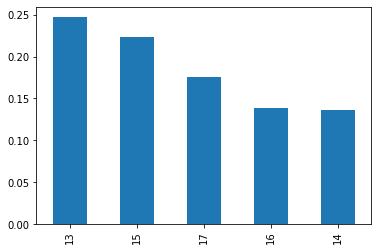

In [449]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(5).plot(kind='bar')
plt.savefig('Feature importance')
plt.show()